# 離散フーリエ変換

## 離散フーリエ変換

### 複素フーリエ級数

$\theta$を角度とすると、円周に沿って値が定義された関数$f(\theta)$（sinやcosなどのこと？？）は周期$T=2\pi$の周期関数であり、$\theta$に$2\pi$の任意の整数倍を足しても引いても$f(\theta)$は同じ値になる。

フーリエ係数の複素表示

$$
f(t)=\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}, \quad C_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
$$

より、$f(\theta)$の基本周波数は$\omega_0=2\pi/T = 1$であるから、$f(\theta)$のフーリエ級数は、


$$
f(\theta)=\sum_{k=-\infty}^{\infty} C_k e^{i k \theta}, \quad C_k=\frac{1}{2 \pi} \int_{-\pi}^\pi f(\theta) e^{-i k \theta} d \theta
$$

と書くことができる。

### 離散フーリエ変換

円周上を$N$分割し、$N$個のサンプル点をとる

$$
\theta_l=\frac{2 \pi}{N} l, \quad l=0,1,2, \ldots, N-1
$$

（1周期が$2\pi$なのを$N$分割したものの$l$倍が$\theta_l$）

このサンプル点での $f(\theta)$ のサンプル値を $f_l=f\left(\theta_l\right)$ とする。

前述のフーリエ係数は連続関数 $f(\theta)$ を無限個の係数 $\left\{C_k\right\}, k=0, \pm 1, \pm 2, \pm 3, \ldots$, で表すものだが、 もし $N$ 個のサンプル値 $\left\{f_l\right\}$ のみが必要な場合は $N$ 個の係数のみで表される。

:::{card}

$$
f_l=\sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N}, \quad F_k=\frac{1}{N} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}
$$

:::

係数 $\left\{F_k\right\}$ をデータ $\left\{f_l\right\}$ の **離散フーリエ変換** と呼ぶ。


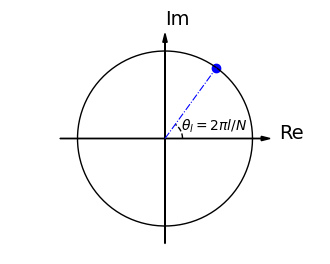

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "Re", fontsize=14, color='black')
ax.text(0, 1.3, "Im", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])


# 単位円
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, 'k-', linewidth=1)  # 黒い実線で単位円を描画

# curve
t = 0.3*np.pi
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, 'k--', linewidth=1)  # 黒い実線で単位円を描画

# text
m = len(x) // 2
ax.text(x[m], y[m], r"$\theta_l = 2\pi l / N$")

# line
x = np.cos(t)
y = np.sin(t)
ax.plot([0, x], [0, y], color="blue", linestyle='-.', linewidth=0.8)
ax.scatter([x], [y], color="blue")

plt.show()

:::{margin}

離散フーリエ変換$F_k$はデータ$f_l$に$e^{i 2 \pi k l / N}$の共役複素数$e^{-i 2 \pi k l / N}$を掛けて$l=0,1,\dots,N-1$にわたって足して$N$で割ったもの
:::

:::{tip}

書籍によっては$1/N$の表記方法が異なる場合がある。$1/N$を$f_l$のほうにもってきて

$$
f_l=\frac{1}{N} \sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N}, \quad F_k=\sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}
$$

としたり、あるいは$l,k$について平等にするため

$$
f_l=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N}, \quad F_k=\frac{1}{\sqrt{N}} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}
$$

とすることがある
:::

### 逆フーリエ変換

:::{card} クロネッカーのデルタ関数の離散バージョン

$$
\frac{1}{N} \sum_{k=0}^{N-1} e^{i 2 \pi(m-n) k / N}
=
\begin{cases}1 & m \equiv n(\bmod N) \\
0 & m \not \equiv n(\bmod N)
\end{cases}
$$

ただし $m \equiv n \quad (\bmod N)$ （$N$ を **法** として **合同** であると読む）は $m-n$ が $N$ の倍数であることを表す。
:::

これを使うことで、データ$\{f_l\}$から離散フーリエ変換$F_k$を定義すると

$$
\begin{aligned}
\sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N} & =\sum_{k=0}^{N-1}\left(\frac{1}{N} \sum_{m=0}^{N-1} f_m e^{-i 2 \pi k m / N}\right) e^{i 2 \pi k l / N} \\
& =\sum_{m=0}^{N-1} f_m\left(\frac{1}{N} \sum_{k=0}^{N-1} e^{i 2 \pi(l-m) k / N}\right)
\end{aligned}
$$

となる。最後の項のカッコの中は$l \equiv m ~ (\bmod N)$のとき1、それ以外は0となる。$0 \leq l<N, 0 \leq m<N$ の範囲では $l \equiv m(\bmod N)$ となるのは$l=m$の場合のみなので、$f_m$を掛けて和$\sum^{N-1}_{m=0}$をとると$f_l$になる。よって逆フーリエ変換の式$f_l=\sum_{k=0}^{N-1} F_k e^{i 2 \pi k l / N}$が成立する。

### 周期的な添字に拡張する

取り扱いを便利にするため、以下では$f_l,F_k$の$l,k=0,1,\dots,N-1$の値を周期的に拡張する。
例えば$f_N=f_0, f_{N+1} = f_1, \dots$とする。

このように拡張すると、総和は任意の連続する $N$ 個の和に置き換えても同じになる。例えば $\sum_{k=0}^{N-1}$ は $\sum_{k=1}^N, \sum_{k=2}^{N+1}, \sum_{k=3}^{N+2}, \ldots$ と書いても $\sum_{k=-1}^{N-2}, \sum_{k=-2}^{N-3}, \ldots$ と書いても同じである。



## 周期関数のサンプリング定理

### 帯域制限

周期 $2 \pi$ の連続関数 $f(\theta)$ がフーリエ級数に展開されるとき、そのフーリエ係数 $C_k$ がある $k$ の範囲以外は 0 であるなら $f(\theta)$ は **帯域制限** されているという。

**帯域制限された周期関数は、ある間隔より細かくサンプルすればフーリエ係数 $C_k$ と離散フーリエ変換 $F_k$ が等しくなる。**


:::{card}

離散フーリエ変換$F_k, |k| < \frac{N}{2}$は次のように書くことができる。

$$
\begin{aligned}
F_k & =\frac{1}{N} \sum_{l=0}^{N-1} f\left(\frac{2 \pi l}{N}\right) e^{-i 2 \pi k l / N}\\
& =\frac{1}{N} \sum_{l=0}^{N-1}\left(\sum_{m=-\infty}^{\infty} C_m e^{i 2 \pi l m / N}\right) e^{-i 2 \pi k l / N} \\
& =\sum_{-N / 2<m<N / 2} C_m\left(\frac{1}{N} \sum_{l=0}^{N-1} e^{i 2 \pi(m-k) l / N}\right)
\end{aligned}
$$

$-N / 2<m<N / 2,-N / 2<k<N / 2$ のとき $m \equiv k ~(\bmod N)$ となるのは $m=k$ の場合しかない。 ゆえに 上式は $C_k$ に等しい。

よって、 **帯域制限された周期関数は、ある間隔より細かくサンプルすればそのサンプル値の補間によって表現できる。**
:::

### 周期関数のサンプリング定理

:::{admonition} 周期関数のサンプリング定理

周期 $2 \pi$ の連続関数 $f(\theta)$ のフーリエ係数 $C_k$ が $|k| \geq \frac{N}{2}$ に対して 0 のとき、$f(\theta)$ は区間 $[0,2 \pi]$ を $N$ 等分して得られるサンプル値 $f_l=f\left(\theta_l\right)$ から次のように再現される

$$
f(\theta)=\sum_{l=0}^{N-1} f_l \phi_N\left(\theta-\theta_l\right)
$$

:::

ただし、 $\phi_N(\theta)$ は次のように定義した補間関数である。

$$
\phi_N(\theta)=\frac{1}{N} \sum_{-N / 2<k<N / 2} e^{i k \theta}=\frac{1+2 \sum_{0<k<N / 2} \cos k \theta}{N}
$$


:::{dropdown}

$|k| \geq N / 2$ では $C_k=0$ であり、 $|k|<$ $N / 2$ では $C_k=F_k$ であるから、 $f(\theta)$ は次のように書ける。

$$
\begin{aligned}
f(\theta) &= \sum_{-N / 2<k<N / 2} F_k e^{i k \theta}\\
&= \sum_{-N / 2<k<N / 2}\left(\frac{1}{N} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}\right) e^{i k \theta} \\
&= \sum_{l=0}^{N-1} f_l\left(\frac{1}{N} \sum_{-N / 2<k<N / 2} e^{i k(\theta-2 \pi l / N)}\right)\\
&= \sum_{l=0}^{N-1} f_l\left(\frac{1}{N} \sum_{-N / 2<k<N / 2} e^{i k(\theta-\theta_l)}\right)\\
&= \sum_{l=0}^{N-1} f_l \phi_N\left(\theta-\theta_l\right)
\end{aligned}
$$
:::

## 畳み込み和定理

:::{admonition} 定義：畳み込み和

周期 $N$ のデータ $\left\{f_l\right\},\left\{g_l\right\}$ の（循環）たたみこみ和 $\left\{f_l * g_l\right\}$ を次のように定義する。

$$
f_l * g_l=\frac{1}{N} \sum_{m=0}^{N-1} f_m g_{l-m}
$$

:::


:::{admonition} 畳み込み和定理

周期 $N$ のデータ $\left\{f_l\right\},\left\{g_l\right\}$ の離散フーリエ変換をそれぞれ $\left\{F_k\right\},\left\{G_k\right\}$ とするとき、 $\left\{f_l * g_l\right\}$ の離散フーリエ変換は $\left\{F_k G_k\right\}$ である
:::


:::{dropdown} 証明

$$
\begin{aligned}
\frac{1}{N} \sum_{l=0}^{N-1} f_l * g_l e^{-i 2 \pi k l / N} & =\frac{1}{N} \sum_{l=0}^{N-1}\left(\frac{1}{N} \sum_{m=0}^{N-1} f_m g_{l-m}\right) e^{-i 2 \pi k l / N} \\
& =\frac{1}{N} \sum_{m=0}^{N-1} f_m\left(\frac{1}{N} \sum_{l=0}^{N-1} g_{l-m} e^{-i 2 \pi k l / N}\right) \\
& =\frac{1}{N} \sum_{m=0}^{N-1} f_m\left(\frac{1}{N} \sum_{l^{\prime}=-m}^{N-1-m} g_{l^{\prime}} e^{-i 2 \pi k\left(l^{\prime}+m\right) / N}\right) \\
& =\frac{1}{N} \sum_{m=0}^{N-1} f_m\left(\frac{1}{N} \sum_{l^{\prime}=0}^{N-1} g_{l^{\prime}} e^{-i 2 \pi k l^{\prime} / N}\right) e^{-i 2 \pi k m / N} \\
& =\left(\frac{1}{N} \sum_{m=0}^{N-1} f_m e^{-i 2 \pi k m / N}\right)\left(\frac{1}{N} \sum_{l^{\prime}=0}^{N-1} g_{l^{\prime}} e^{-i 2 \pi k l^{\prime} / N}\right) \\
& =F_k G_k
\end{aligned}
$$

:::

## パワースペクトル

:::{admonition} パーセバルの式

$$
\frac{1}{N} \sum_{l=0}^{N-1} f_l \overline{g_l}=\sum_{k=0}^{N-1} F_k \overline{G_k}, \quad \frac{1}{N} \sum_{l=0}^{N-1}\left|f_l\right|^2=\sum_{k=0}^{N-1}\left|F_k\right|^2
$$

:::


$(1 / N) \sum_{l=0}^{N-1}\left|f_l\right|^2$ は $\left\{f_l\right\}$ の平均エネルギーを表しているとみなせる。パーセバルの式の第2式はこれが $\sum_{k=0}^{N-1}\left|F_k\right|^2$ で表されることを意味している。したがってパワースペクトルを

$$
P_k := |F_k|^2
$$

と定義するとパーセバルの式の第2式は

$$
\frac{1}{N} \sum_{l=0}^{N-1}\left|f_l\right|^2=\sum_{k=0}^{N-1} P_k
$$

と書き換えることができる。

データ$\{f_k\}$が実数のとき、$F_{-k} = \overline{F_k}$であるから$P_{-k} = P_k$である。なので$P_k$のグラフを$k = \dots, -2, -1, 0, 1, 2, \dots$に対してプロットすると$k=0$に関して左右対称になる。

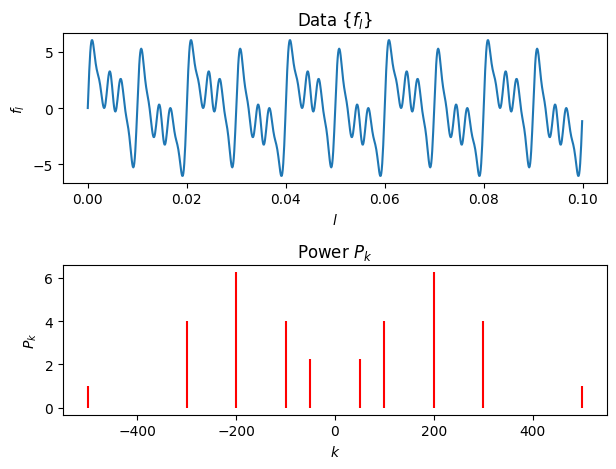

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成する
N = 1000
d = 0.0001 # サンプリング周期
t = np.arange(0, N * d, d) # 時間

f = np.zeros_like(t)
components = [
    # (スペクトルF_k, 周期θ)
    (1.5, 50),
    (2, 100),
    (2.5, 200),
    (2, 300),
    (1, 500),
]
for F_k, frequency_k in components:
    f += F_k * np.sin(t * 2 * np.pi * frequency_k)

F = np.fft.fft(f) # フーリエ変換
freq = np.fft.fftfreq(N, d=d)  # 周波数スケール

# 振幅スペクトル Amplitude の取得
# 振幅スペクトルは信号をフーリエ変換した結果の絶対値をとったもの
Amp = np.abs(F)
Amp = Amp / (N / 2) # 正規化
Pow = Amp**2

# 結果をプロット
fig, axes = plt.subplots(nrows=2)
axes[0].plot(t, f)
axes[0].set(title=r'Data $\{ f_l \}$', xlabel=r"$l$", ylabel=r"$f_l$")

axes[1].stem(freq, Pow, 'r', markerfmt=" ", basefmt=" ")
# 左右対称なので正の値だけ N//2 で取り出してもいい
# axes[1].stem(freq[:N//2], Amp[:N//2], 'r', markerfmt=" ", basefmt=" ")
axes[1].set(title=f'Power $P_k$', xlabel=r'$k$', ylabel=r'$P_k$', xlim=(-550, 550))

fig.tight_layout()
fig.show()

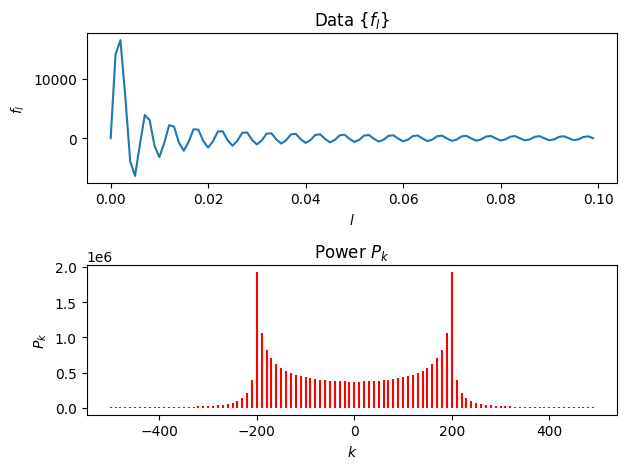

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成する
N = 100
d = 0.001 # サンプリング周期
t = np.arange(0, N * d, d) # 時間

f = np.zeros_like(t)
for k in range(2 * N):  # 適当にNより大きいkにしてみる
    F_k = k
    frequency_k = k
    f += F_k * np.sin(t * 2 * np.pi * frequency_k)

F = np.fft.fft(f) # フーリエ変換
freq = np.fft.fftfreq(N, d=d)  # 周波数スケール

# 振幅スペクトル Amplitude の取得
# 振幅スペクトルは信号をフーリエ変換した結果の絶対値をとったもの
Amp = np.abs(F)
Amp = Amp / (N / 2) # 正規化
Pow = Amp**2

# 結果をプロット
fig, axes = plt.subplots(nrows=2)
axes[0].plot(t, f)
axes[0].set(title=r'Data $\{ f_l \}$', xlabel=r"$l$", ylabel=r"$f_l$")

axes[1].stem(freq, Pow, 'r', markerfmt=" ", basefmt=" ")
# 左右対称なので正の値だけ N//2 で取り出してもいい
# axes[1].stem(freq[:N//2], Amp[:N//2], 'r', markerfmt=" ", basefmt=" ")
axes[1].set(title=f'Power $P_k$', xlabel=r'$k$', ylabel=r'$P_k$')

fig.tight_layout()
fig.show()

## 自己相関係数

周期 $N$ のデータ $\{f_l\}$ の自己相関係数 $\{R_n\}$ を次のように定義する。

$$
R_n=\frac{1}{N} \sum_{l=0}^{N-1} f_l \overline{f_{l-n}}
$$



## ウィーナー・ヒンチンの定理

:::{admonition} ウィーナー・ヒンチンの定理

周期 $N$ のデータ $\left\{f_l\right\}$ の自己相関係数 $\left\{R_n\right\}$ の離散フーリエ変換はパワースペクトルに等しい

$$
P_k=\frac{1}{N} \sum_{n=0}^{N-1} R_n e^{-i 2 \pi k n / N}
$$
:::


:::{dropdown} 証明

$$
\begin{aligned}
\frac{1}{N} \sum_{n=0}^{N-1} R_n e^{-i 2 \pi k n / N} & =\frac{1}{N} \sum_{n=0}^{N-1}\left(\frac{1}{N} \sum_{l=0}^{N-1} f_l \overline{f_{l-n}}\right) e^{-i 2 \pi k n / N} \\
& =\frac{1}{N} \sum_{l=0}^{N-1} f_l\left(\frac{1}{N} \sum_{n=0}^{N-1} \overline{f_{l-n}} e^{-i 2 \pi k n / N}\right) \\
& =\frac{1}{N} \sum_{l=0}^{N-1} \overline{f_l\left(\frac{1}{N} \sum_{n=0}^{N-1} f_{l-n} e^{i 2 \pi k n / N}\right)} \\
& =\frac{1}{N} \sum_{l=0}^{N-1} f_l\left(\frac{1}{N} \sum_{n^{\prime}=0}^{N-1} f_{n^{\prime}} e^{i 2 \pi k\left(l-n^{\prime}\right) / N}\right) \\
& = \left(\frac{1}{N} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}\right) \overline{\left(\frac{1}{N} \sum_{n^{\prime}=0}^{N-1} f_{n^{\prime}} e^{-i 2 \pi k n^{\prime} / N}\right)}
\\
& =F_k \overline{F_k}=\left\lvert\, \frac{1}{N} \sum_{n^{\prime}=0}^{N-1} f^2=P_k\right.
\end{aligned}
$$
:::

## まとめ

$$
\begin{array}{ccc}
f_l & \longrightarrow & F_k=\frac{1}{N} \sum_{l=0}^{N-1} f_l e^{-i 2 \pi k l / N}
\\
\downarrow & & \downarrow \\
R_n=\frac{1}{N} \sum_{l=0}^{N-1} f_l \overline{f_{l-n}}
& \longrightarrow & P_k=\left\{\begin{array}{l}
\left|F_k\right|^2 \\
\frac{1}{N} \sum_{n=0}^{N-1} R_n e^{-i 2 \pi k n / N}
\end{array}\right.
\end{array}
$$


連続のフーリエ変換と同様に、ウィーナー・ヒンチンの定理を使うことでもパワースペクトルを得ることができる。

しかし離散の場合は高速フーリエ変換があるため、ウィーナー・ヒンチンの定理を使うことによる計算量削減などの効果は相対的に低い。実用上は高速フーリエ変換一択になる。
